In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

## sigle thread

In [10]:
def plot(data_list, title, labels):

    fig, ax = plt.subplots(figsize=[8, 8])

    boxes = []
    ticks = []

    for i in range(0,len(data_list)):
        boxes.append(data_list[i])
        ticks.append(labels[i])

    bplot = ax.boxplot(boxes, showfliers=False)
    # Etichette per gli assi
    ax.set_xticks(range(1,len(labels)+1),ticks)
    ax.set(ylabel = 'Microseconds')
    ax.set(title = title)
    ax.set_yscale('log')

    for median in bplot['medians']:
        median.set_color('red')
    plt.figtext(0.78, 0.9, f"runs: {len(data_list[0])}\nn_elem: {n_elem}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    plt.show()

In [ ]:
# rimuovi .txt a mano altrimenti aggiunge dati a gia esistenti poi run $./single.sh nomepush/pop n_runs n_elem 

pop back

In [74]:
!./single.sh pop_back 50 1600

deque: 1079.0
hold_wait: 1741.5
hold: 1784.0
relax: 1716.5


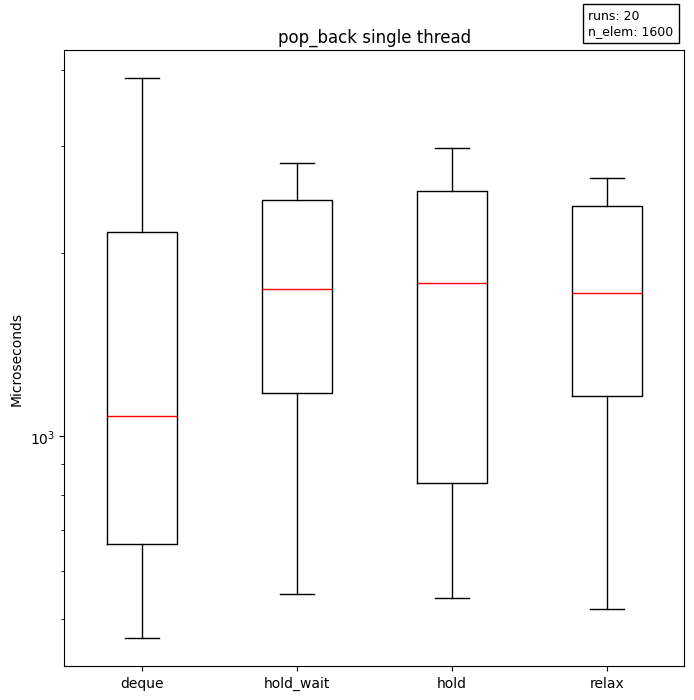

In [ ]:
# dati test
nomi = ["deque", "hold_wait", "hold", "relax"]
dati_pop_back = []
for i in range(4):
    dati_pop_back.append(np.genfromtxt("test_"+nomi[i]+"_pop_back.txt",delimiter=',',dtype=int)[:-1])

n_elem = 16000

# Calcola e stampa le mediane per taella in report
for nome, dati in zip(nomi, dati_pop_back):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_pop_back,"pop_back single thread", nomi)

pop front

In [72]:
!./single.sh pop_front 50 1600

deque: 2169.0
hold_wait: 2398.5
hold: 2323.0
relax: 2193.0


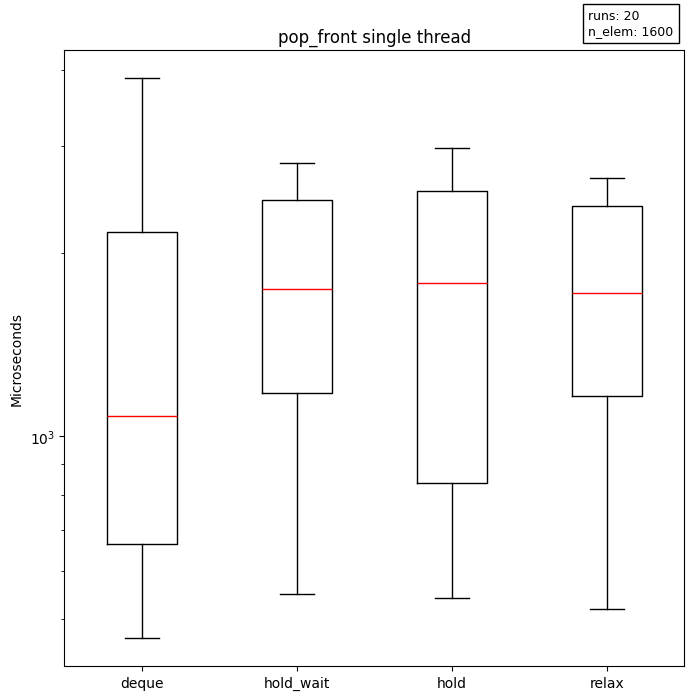

In [ ]:
# pop_front
# dati test
nomi = ["deque", "hold_wait", "hold", "relax"]
dati_pop_frot = []
for i in range(4):
    dati_pop_frot.append(np.genfromtxt("test_"+nomi[i]+"_pop_front.txt",delimiter=',',dtype=int)[:-1])
    
n_elem = 16000

# Calcola e stampa le mediane per taella in report
for nome, dati in zip(nomi, dati_pop_frot):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_pop_back,"pop_front single thread", nomi)

push back

In [67]:
!./single.sh push_back 50 1600

deque: 1801.0
hold_wait: 1967.5
hold: 1733.5
relax: 1683.5


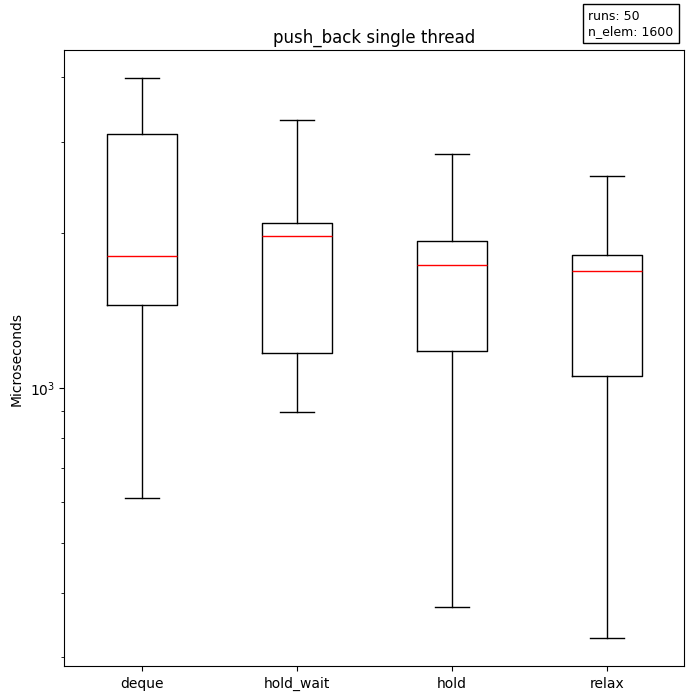

In [ ]:
# push_back
# dati test
nomi = ["deque", "hold_wait", "hold", "relax"]
dati_push_back = []
for i in range(4):
    dati_push_back.append(np.genfromtxt("test_"+nomi[i]+"_push_back.txt",delimiter=',',dtype=int)[:-1])
    
n_elem = 16000
for nome, dati in zip(nomi, dati_push_back):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_push_back,"push_back single thread", nomi)

push front

In [70]:
!./single.sh push_front 50 1600

deque: 2939.0
hold_wait: 1883.0
hold: 1145.0
relax: 1602.0


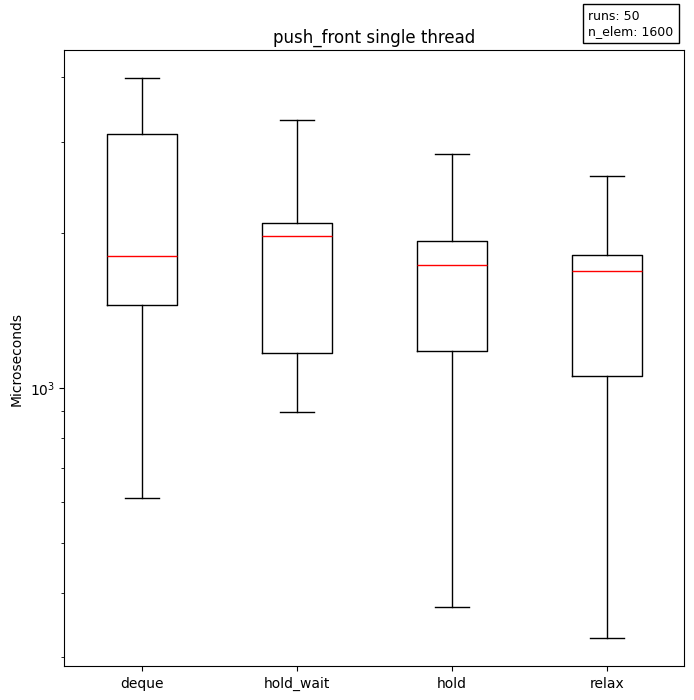

In [ ]:
# push_front
# dati test
nomi = ["deque", "hold_wait", "hold", "relax"]
dati_push_front = []
for i in range(4):
    dati_push_front.append(np.genfromtxt("test_"+nomi[i]+"_push_front.txt",delimiter=',',dtype=int)[:-1])
    
n_elem = 16000
for nome, dati in zip(nomi, dati_push_front):
    mediana = np.median(dati)
    print(f"{nome}: {mediana}")
plot(dati_push_back,"push_front single thread", nomi)

## multithread

In [4]:
n_thread = [2,4,6,8] #hard code in .sh copialo da li
n_elem = 1600 ##hard code quando fai run di fie.sh

In [5]:
def multi_plot(data1, data2, data3, data4, title, labels, n_threads):
    fig, ax = plt.subplots(figsize=[10, 10])

    boxes = []
    colors = []
    group_positions = []  # Per le etichette centrate

    color_map = ["peachpuff", "orange", "yellow", "blue"]

    for i in range(len(n_threads)):
        boxes.extend([data1[i], data2[i], data3[i], data4[i]])
        colors.extend(color_map)
        # Ogni gruppo di 4 box parte alla posizione 4*i+1 → il centro è +1.5
        group_center = 4 * i + 2.5
        group_positions.append(group_center)

    # Crea boxplot
    bplot = ax.boxplot(boxes, showfliers=False, patch_artist=True)

    # Colori per ogni box
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # Etichette centrate per ogni gruppo
    ax.set_xticks(group_positions)
    ax.set_xticklabels([str(n) for n in n_threads])

    # Etichette e titolo
    ax.set_ylabel('Microseconds')
    ax.set_xlabel('n_threads')
    ax.set_title(title, loc='left')
    ax.set_yscale('log')
    
    # Legenda (usiamo solo il primo gruppo per i colori)
    legend_handles = [bplot["boxes"][i] for i in range(4)]
    ax.legend(legend_handles, labels, loc='upper right')

    # Mediane in rosso
    for median in bplot['medians']:
        median.set_color('red')

    plt.figtext(0.78, 0.98, f"runs: {len(data1[0])}\nn_elem: {n_elem}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))

    plt.tight_layout()
    plt.show()

    # ======= Calcolo e stampa delle mediane numeriche =======
    print(f"\n=== Median values for {title} ===")
    medians = [np.median(b) for b in boxes]
    
    for i, n in enumerate(n_threads):
        print(f"\nThreads = {n}")
        for j, label in enumerate(labels):
            idx = i * 4 + j
            print(f"  {label:>12}: {medians[idx]:.2f}")


push front multi

In [25]:
!rm test_*_push_front_multi_*.txt

manualmente modifica numero thread in n_thread

In [ ]:
!./multi_one_at_time.sh push_front relax 2 1600 2

In [ ]:
!./multi_one_at_time.sh push_front hold 2 1600 2

In [ ]:
!./multi_one_at_time.sh push_front hold_wait 2 1600 2

In [ ]:
!./multi_one_at_time.sh push_front deque 2 1600 2

In [14]:
#carica dati da .txt
dati_deque_push_front_multi = []
dati_hold_push_front_multi = []
dati_hold_wait_push_front_multi = []
dati_relax_push_front_multi = []

for i,th in enumerate(n_thread):
    dati_deque_push_front_multi.append(np.genfromtxt("test_deque_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_push_front_multi.append(np.genfromtxt("test_hold_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_wait_push_front_multi.append(np.genfromtxt("test_hold_wait_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_relax_push_front_multi.append(np.genfromtxt("test_relax_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])

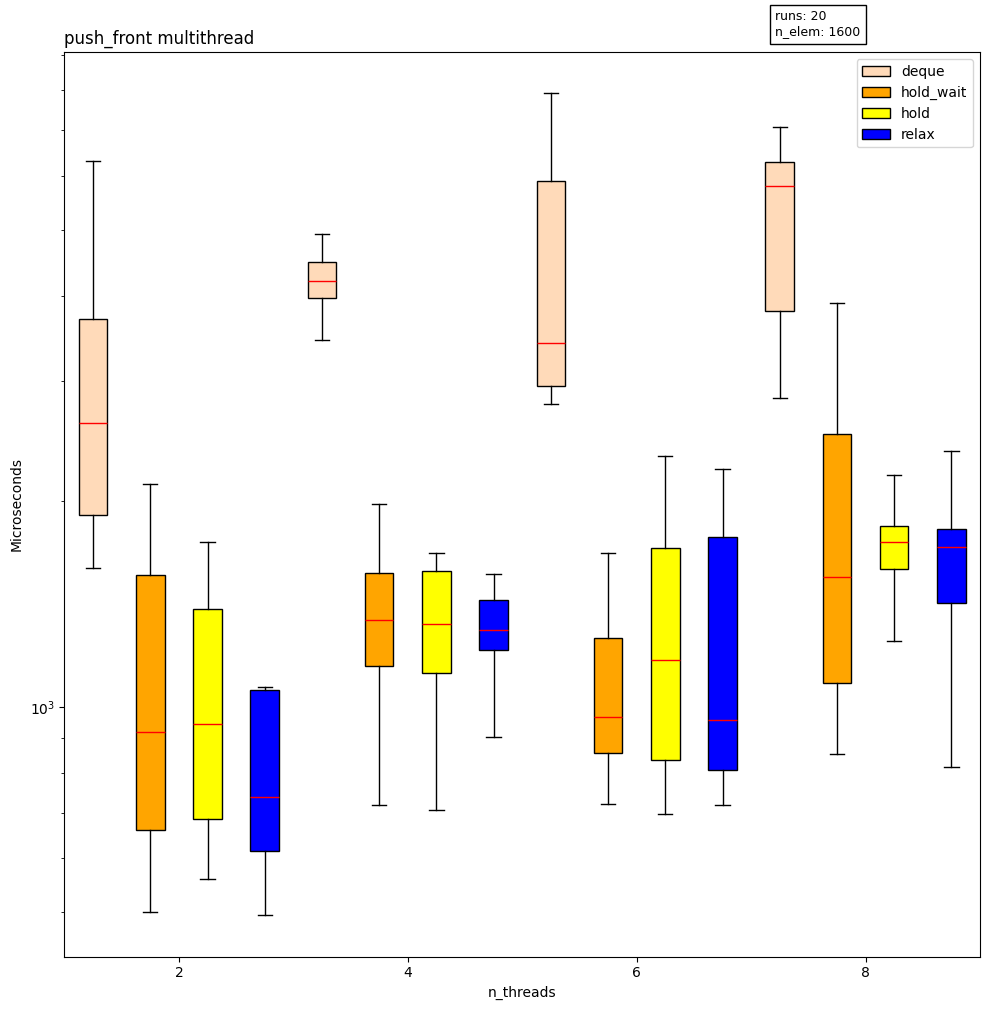


=== Median values for push_front multithread ===

Threads = 2
         deque: 2600.50
     hold_wait: 918.00
          hold: 944.50
         relax: 737.00

Threads = 4
         deque: 4207.50
     hold_wait: 1339.00
          hold: 1323.50
         relax: 1295.50

Threads = 6
         deque: 3411.50
     hold_wait: 968.00
          hold: 1171.50
         relax: 956.50

Threads = 8
         deque: 5797.00
     hold_wait: 1547.50
          hold: 1741.00
         relax: 1713.00


In [15]:
multi_plot(dati_deque_push_front_multi, dati_hold_push_front_multi, dati_hold_wait_push_front_multi,dati_relax_push_front_multi , "push_front multithread", ["deque","hold_wait","hold","relax"], n_thread)

push back multi

In [28]:
!rm test_*_push_back_multi_*.txt

rm: cannot remove 'test_*_push_back_multi_*.txt': No such file or directory


In [ ]:
!./multi_one_at_time.sh push_back relax 2 1600 2

In [ ]:
!./multi_one_at_time.sh push_back hold 2 1600 2

In [ ]:
!./multi_one_at_time.sh push_back hold_wait 2 1600 2

In [ ]:
!./multi_one_at_time.sh push_back deque 2 1600 2

In [18]:
#carica dati da .txt
dati_deque_push_back_multi = []
dati_hold_push_back_multi = []
dati_hold_wait_push_back_multi = []
dati_relax_push_back_multi = []

for i,th in enumerate(n_thread):
    dati_deque_push_back_multi.append(np.genfromtxt("test_deque_push_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_push_back_multi.append(np.genfromtxt("test_hold_push_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_wait_push_back_multi.append(np.genfromtxt("test_hold_wait_push_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_relax_push_back_multi.append(np.genfromtxt("test_relax_push_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])

In [ ]:
#calcolo e stampa mediane


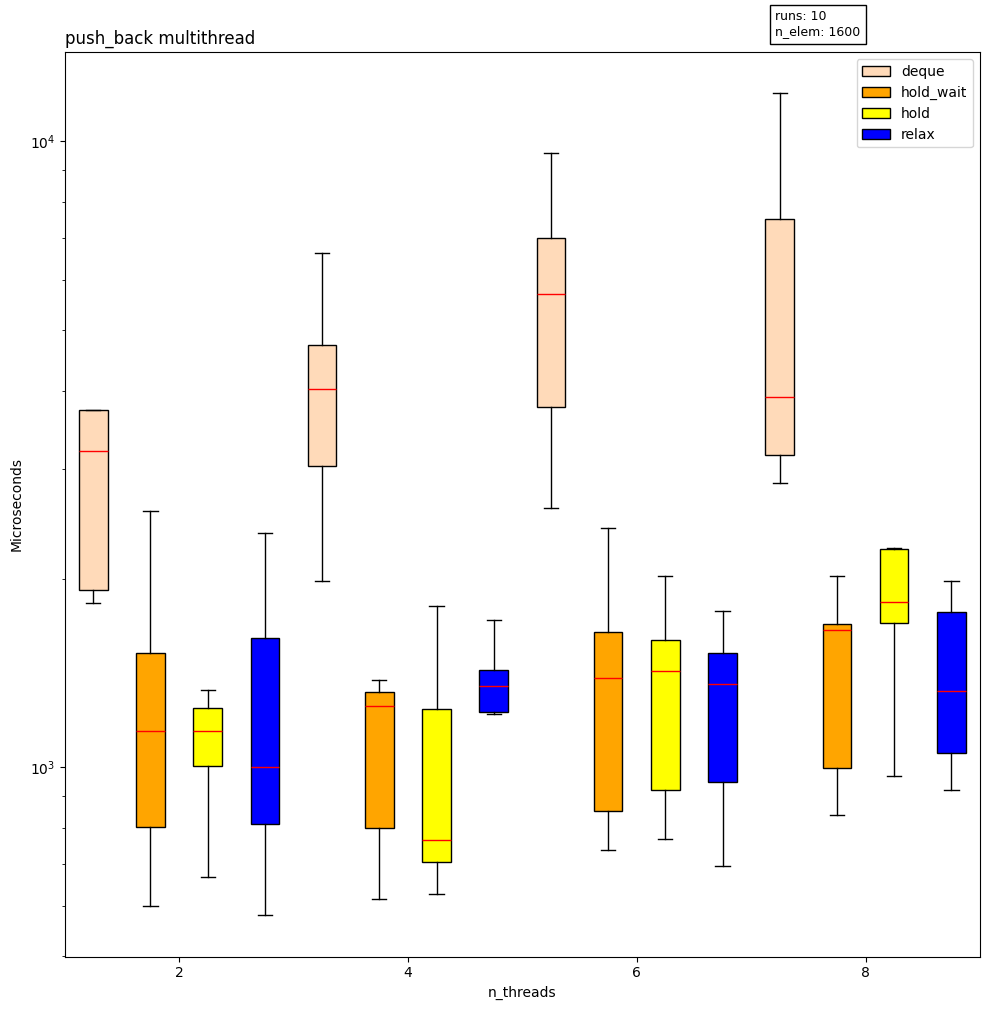


=== Median values for push_back multithread ===

Threads = 2
         deque: 3204.00
     hold_wait: 1143.00
          hold: 1144.00
         relax: 1001.50

Threads = 4
         deque: 4025.00
     hold_wait: 1252.00
          hold: 766.00
         relax: 1347.50

Threads = 6
         deque: 5699.00
     hold_wait: 1390.50
          hold: 1424.00
         relax: 1359.50

Threads = 8
         deque: 3911.00
     hold_wait: 1657.50
          hold: 1835.00
         relax: 1325.50


In [19]:
multi_plot(dati_deque_push_back_multi, dati_hold_push_back_multi, dati_hold_wait_push_back_multi,dati_relax_push_back_multi , "push_back multithread", ["deque","hold_wait","hold","relax"], n_thread)

pop back

In [20]:
n_elem = 16000

In [32]:
!rm test_*_pop_back_multi_*.txt

rm: cannot remove 'test_*_pop_back_multi_*.txt': No such file or directory


In [ ]:
!./multi_one_at_time.sh pop_back relax 2 1600 2

In [ ]:
!./multi_one_at_time.sh pop_back hold 2 1600 2

In [ ]:
!./multi_one_at_time.sh pop_back hold_wait 2 1600 2

In [ ]:
!./multi_one_at_time.sh pop_back deque 2 1600 2

In [21]:
#carica dati da .txt
dati_deque_pop_back_multi = []
dati_hold_pop_back_multi = []
dati_hold_wait_pop_back_multi = []
dati_relax_pop_back_multi = []

for i,th in enumerate(n_thread):
    dati_deque_pop_back_multi.append(np.genfromtxt("test_deque_pop_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_pop_back_multi.append(np.genfromtxt("test_hold_pop_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_wait_pop_back_multi.append(np.genfromtxt("test_hold_wait_pop_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_relax_pop_back_multi.append(np.genfromtxt("test_relax_pop_back_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])

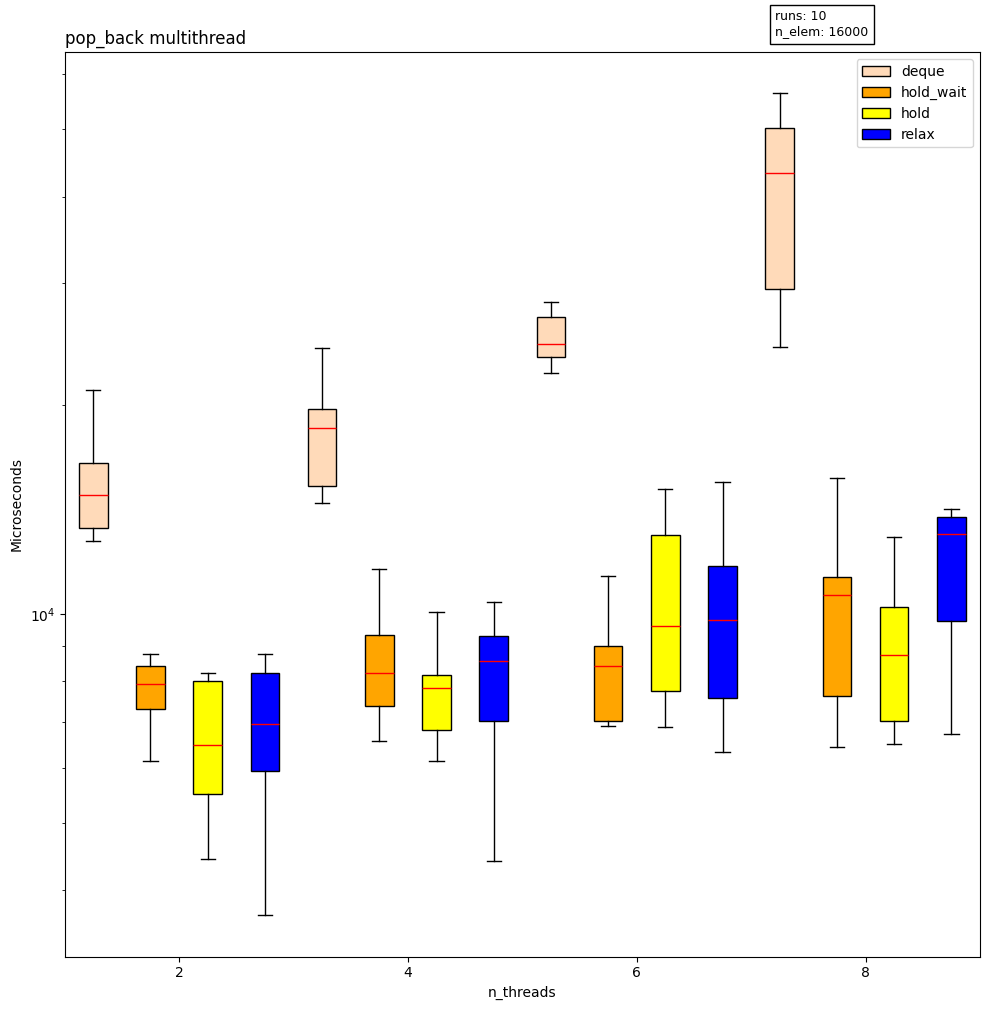


=== Median values for pop_back multithread ===

Threads = 2
         deque: 14841.50
     hold_wait: 7938.00
          hold: 6482.00
         relax: 6949.00

Threads = 4
         deque: 18558.00
     hold_wait: 8223.50
          hold: 7827.50
         relax: 8556.50

Threads = 6
         deque: 24492.50
     hold_wait: 8425.00
          hold: 9616.50
         relax: 9817.50

Threads = 8
         deque: 43288.00
     hold_wait: 10661.00
          hold: 8728.50
         relax: 13057.50


In [22]:
multi_plot(dati_deque_pop_back_multi, dati_hold_pop_back_multi, dati_hold_wait_pop_back_multi,dati_relax_pop_back_multi , "pop_back multithread", ["deque","hold_wait","hold","relax"], n_thread)

pop front multi

In [ ]:
!rm test_*_pop_front_multi_*.txt

In [ ]:
!./multi_one_at_time.sh pop_front relax 2 1600 2

In [ ]:
!./multi_one_at_time.sh pop_front hold 2 1600 2

In [ ]:
!./multi_one_at_time.sh pop_front hold_wait 2 1600 2

In [ ]:
!./multi_one_at_time.sh pop_front deque 2 1600 2

In [51]:
#carica dati da .txt
dati_deque_pop_front_multi = []
dati_hold_pop_front_multi = []
dati_hold_wait_pop_front_multi = []
dati_relax_pop_front_multi = []

for i,th in enumerate(n_thread):
    dati_deque_pop_front_multi.append(np.genfromtxt("test_deque_pop_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_pop_front_multi.append(np.genfromtxt("test_hold_pop_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_wait_pop_front_multi.append(np.genfromtxt("test_hold_wait_pop_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_relax_pop_front_multi.append(np.genfromtxt("test_relax_pop_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])

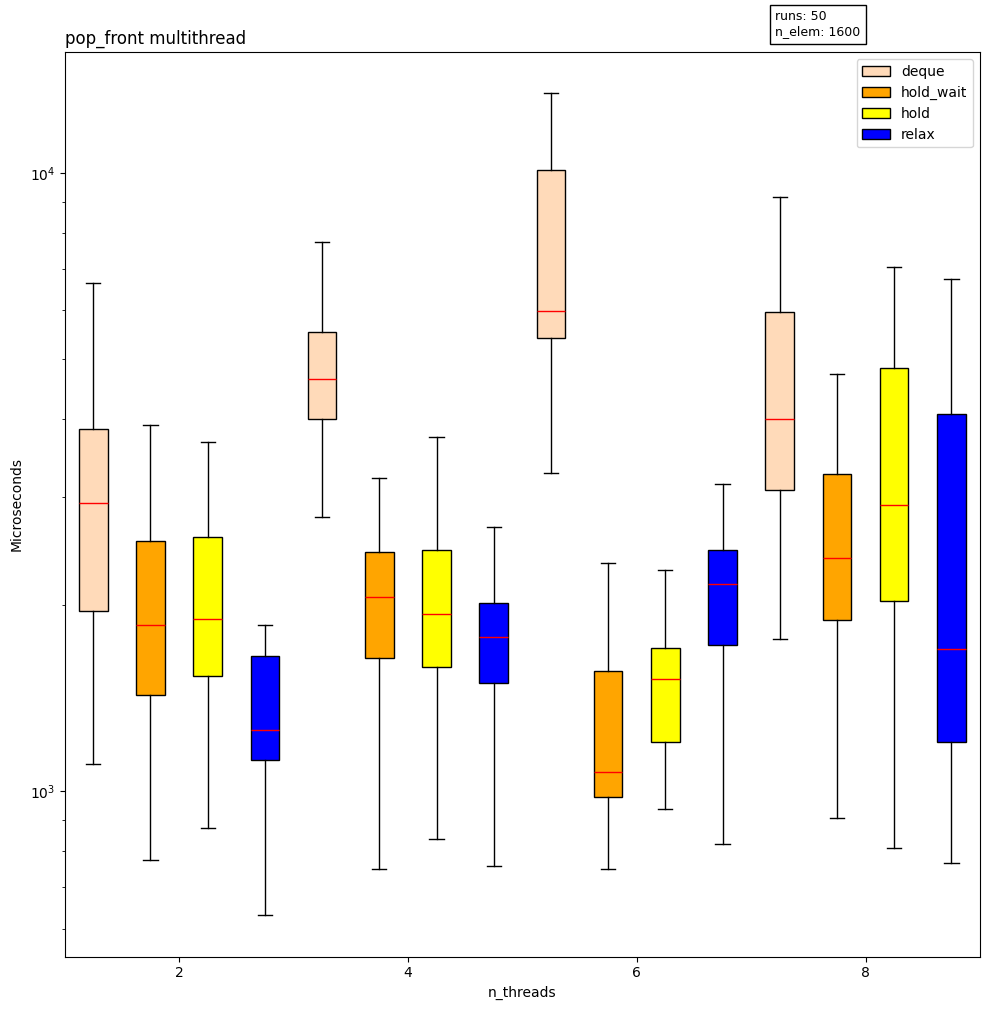


=== Median values for pop_front multithread ===

Threads = 2
         deque: 2927.50
     hold_wait: 1862.00
          hold: 1898.50
         relax: 1256.00

Threads = 4
         deque: 4654.00
     hold_wait: 2060.50
          hold: 1933.50
         relax: 1775.50

Threads = 6
         deque: 5988.50
     hold_wait: 1073.50
          hold: 1517.50
         relax: 2166.00

Threads = 8
         deque: 4002.00
     hold_wait: 2382.00
          hold: 2902.00
         relax: 1698.50


In [52]:
multi_plot(dati_deque_pop_front_multi, dati_hold_pop_front_multi, dati_hold_wait_pop_front_multi,dati_relax_pop_front_multi , "pop_front multithread", ["deque","hold_wait","hold","relax"], n_thread)

## Random

In [40]:
!rm test_*_pop_push_rand_*.txt

In [ ]:
!./random.sh 5 16000

In [53]:
#carica dati da .txt
dati_deque_random = []
dati_hold_random = []
dati_hold_wait_random = []
dati_relax_random = []

for i,th in enumerate(n_thread):
    dati_deque_random.append(np.genfromtxt("test_deque_pop_push_rand_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_random.append(np.genfromtxt("test_hold_pop_push_rand_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_wait_random.append(np.genfromtxt("test_hold_wait_pop_push_rand_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_relax_random.append(np.genfromtxt("test_relax_pop_push_rand_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])

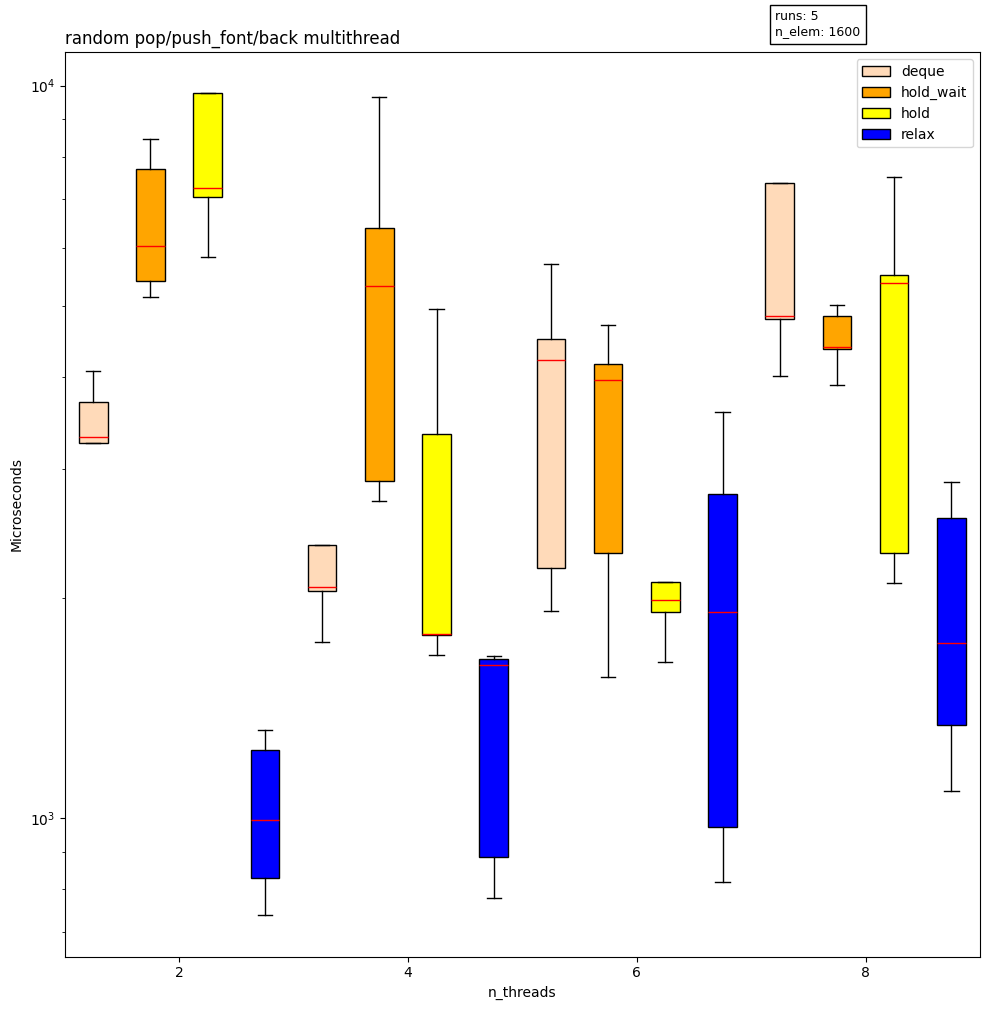


=== Median values for random pop/push_font/back multithread ===

Threads = 2
         deque: 3313.00
     hold_wait: 6039.00
          hold: 7253.00
         relax: 994.00

Threads = 4
         deque: 2072.00
     hold_wait: 5331.00
          hold: 1784.00
         relax: 1617.00

Threads = 6
         deque: 4219.00
     hold_wait: 3965.00
          hold: 1989.00
         relax: 1914.00

Threads = 8
         deque: 4851.00
     hold_wait: 4393.00
          hold: 5377.00
         relax: 1736.00


In [54]:
multi_plot(dati_deque_random, dati_hold_random, dati_hold_wait_random,dati_relax_random , "random pop/push_font/back multithread", ["deque","hold_wait","hold","relax"], n_thread)

## test vs TBB cuncurrentqueue


In [ ]:
n_thread = [2,4,6,8] #hard code in .sh copialo da li
n_elem = 16000 ##hard code quando fai run di fie.sh

In [62]:
def multi_plot(data1, data2, data3, data4, title, labels, n_threads):
    fig, ax = plt.subplots(figsize=[10, 10])

    boxes = []
    colors = []
    group_positions = []  # Per le etichette centrate

    color_map = ["peachpuff", "orange", "yellow", "blue"]

    for i in range(len(n_threads)):
        boxes.extend([data1[i], data2[i], data3[i], data4[i]])
        colors.extend(color_map)
        # Ogni gruppo di 4 box parte alla posizione 4*i+1 → il centro è +1.5
        group_center = 4 * i + 2.5
        group_positions.append(group_center)

    # Crea boxplot
    bplot = ax.boxplot(boxes, showfliers=False, patch_artist=True)

    # Colori per ogni box
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # Etichette centrate per ogni gruppo
    ax.set_xticks(group_positions)
    ax.set_xticklabels([str(n) for n in n_threads])

    # Etichette e titolo
    ax.set_ylabel('Microseconds')
    ax.set_xlabel('n_threads')
    ax.set_title(title, loc='left')
    ax.set_yscale('log')

    # Legenda (usiamo solo il primo gruppo per i colori)
    legend_handles = [bplot["boxes"][i] for i in range(4)]
    ax.legend(legend_handles, labels, loc='upper right')

    # Mediane in rosso
    for median in bplot['medians']:
        median.set_color('red')

    plt.figtext(0.78, 0.98, f"runs: {len(data1[0])}\nn_elem: {n_elem}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))

    plt.tight_layout()
    plt.show()

    # ======= Calcolo e stampa delle mediane numeriche =======
    print(f"\n=== Median values for {title} ===")
    medians = [np.median(b) for b in boxes]
    
    for i, n in enumerate(n_threads):
        print(f"\nThreads = {n}")
        for j, label in enumerate(labels):
            idx = i * 4 + j
            print(f"  {label:>12}: {medians[idx]:.2f}")

In [59]:
!./multi_vstbb_push.sh push_front 10 1600

In [60]:
#carica dati da .txt
dati_tbbqueue_push_multi = []
dati_hold_push_front_multi = []
dati_hold_wait_push_front_multi = []
dati_relax_push_front_multi = []

for i,th in enumerate(n_thread):
    dati_tbbqueue_push_multi.append(np.genfromtxt("test_tbbqueue_push_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_push_front_multi.append(np.genfromtxt("test_hold_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_hold_wait_push_front_multi.append(np.genfromtxt("test_hold_wait_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])
    dati_relax_push_front_multi.append(np.genfromtxt("test_relax_push_front_multi_numthread"+str(th)+".txt",delimiter=',',dtype=int)[:-1])

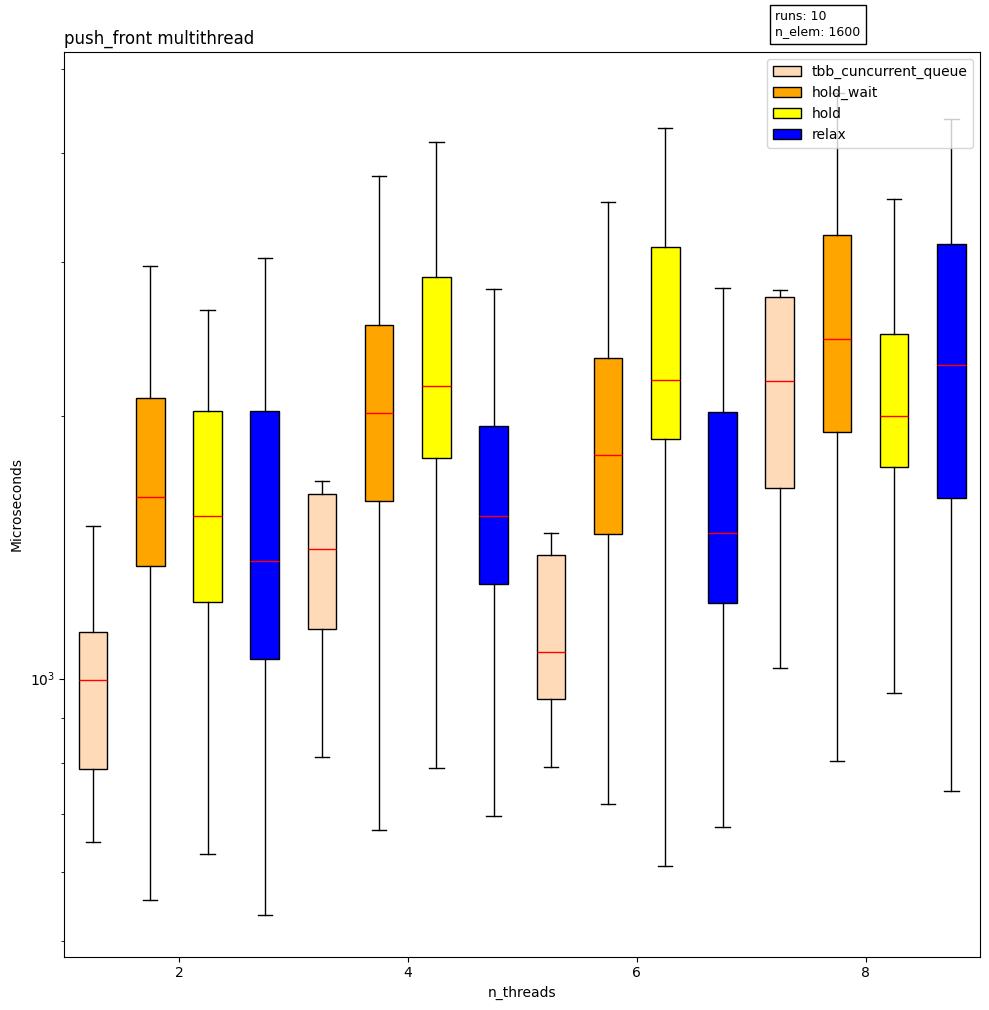


=== Median values for push_front multithread ===

Threads = 2
  tbb_cuncurrent_queue: 997.00
     hold_wait: 1616.00
          hold: 1537.50
         relax: 1364.50

Threads = 4
  tbb_cuncurrent_queue: 1407.00
     hold_wait: 2017.00
          hold: 2166.50
         relax: 1534.50

Threads = 6
  tbb_cuncurrent_queue: 1072.50
     hold_wait: 1802.00
          hold: 2196.50
         relax: 1466.50

Threads = 8
  tbb_cuncurrent_queue: 2191.50
     hold_wait: 2447.50
          hold: 2001.50
         relax: 2286.50


In [63]:
multi_plot(dati_tbbqueue_push_multi, dati_hold_push_front_multi, dati_hold_wait_push_front_multi,dati_relax_push_front_multi , "push_front multithread", ["tbb_cuncurrent_queue","hold_wait","hold","relax"], n_thread)